# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [229]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

model = 'Dangendorf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [230]:
# Open data file
tg_data = imprt.import_obs_slh_data()

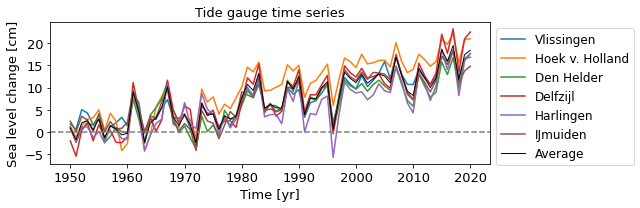

In [231]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [232]:
pres_data_era5 = imprt.import_obs_wind_data(model = model, data_type = 'era5')

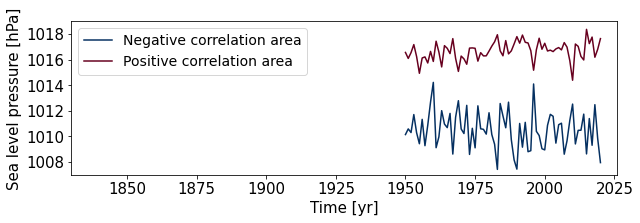

In [233]:
figs.plot_obs_pres_data(pres_data_era5, model, 'era5', title = False)

#### Plot the Dangendorf regions

In [234]:
pres_corr, tg_corr = imprt.import_pres_tg_corr_data('era5')

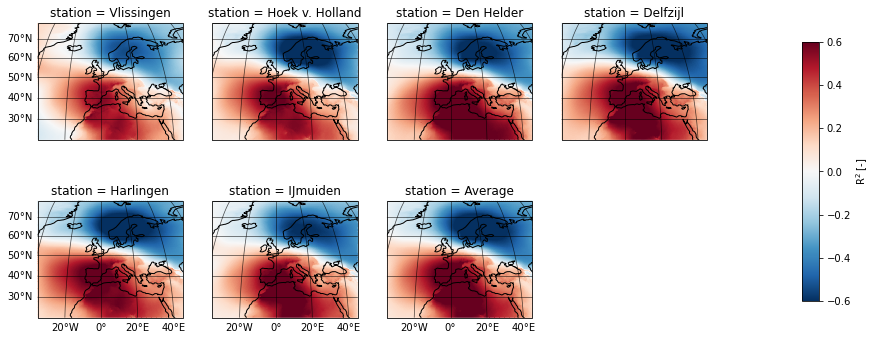

In [235]:
figs.dangendorf_all_stations_corr(pres_corr, tg_corr, 'era5')

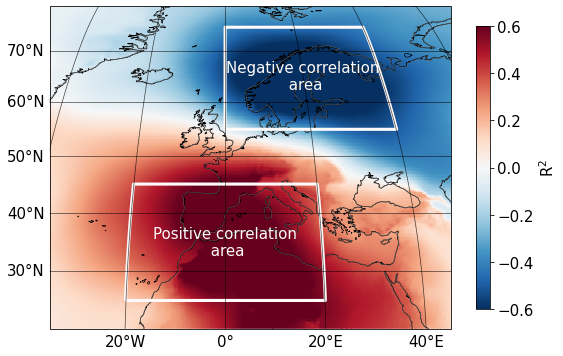

In [236]:
figs.dangendorf_regions_plot(pres_corr, tg_corr, 'era5', year_start = 1950, year_final = 2020)

### Perform regression

In [237]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(pres_data_era5, 
                                                                                tg_data, 
                                                                                wind_model = model, 
                                                                                data_type = 'era5')

In [238]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, neg}$","R$^2_{adj, pos}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.799459,0.244935,0.156003,0.255038,0.706408,0.790479,0.211126,0.118212,0.221682,0.693262
Hoek v. Holland,0.890242,0.256999,0.198586,0.264662,0.7783,0.885327,0.22373,0.162702,0.231736,0.768373
Den Helder,0.814672,0.401558,0.258949,0.393361,0.60773,0.806373,0.374762,0.225767,0.366198,0.590166
Delfzijl,0.847371,0.360237,0.255307,0.351092,0.66757,0.840537,0.33159,0.221962,0.322036,0.652685
Harlingen,0.787877,0.438797,0.339559,0.398194,0.522727,0.778379,0.413668,0.309987,0.371248,0.501357
IJmuiden,0.793118,0.3388,0.212638,0.338116,0.635258,0.783855,0.309194,0.177383,0.30848,0.618926
Average,0.867811,0.355597,0.248107,0.349753,0.69565,0.861893,0.326743,0.21444,0.320638,0.682022


In [239]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.799459,0.244935,0.156003,0.255038,2.288996,7.348812,-0.921722,0.851611,3.917110
Hoek v. Holland,0.890242,0.256999,0.198586,0.264662,2.209181,9.960944,-1.726378,0.749986,5.419563
Den Helder,0.814672,0.401558,0.258949,0.393361,2.226024,6.357774,-1.206785,1.473800,3.430187
Delfzijl,0.847371,0.360237,0.255307,0.351092,2.616555,7.614678,-1.798100,1.422211,4.802651
Harlingen,0.787877,0.438797,0.339559,0.398194,2.519593,5.832838,-1.910615,1.268244,3.314715
IJmuiden,0.793118,0.338800,0.212638,0.338116,2.364824,7.142322,-1.062896,1.291196,3.616755
Average,0.867811,0.355597,0.248107,0.349753,2.018378,7.376228,-1.437749,1.176175,4.083497


In [240]:
timeseries_era5

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             0.231642            -0.134268 -6.689739 -6.592365   0.097374   
1951            -0.049417            -0.671254 -6.498603 -7.219275  -0.720671   
1952             0.131377            -0.151842 -6.307468 -6.327933  -0.020465   
1953            -0.761140             0.569489 -6.116333 -6.307984  -0.191652   
1954             0.141493            -0.503407 -5.925197 -6.287111  -0.361914   
...                   ...                  ...       ...       ...        ...   
2016            -0.564230             0.657626  5.925197  6.018594   0.093396   
2017             0.763711             1.245181  6.116333  8.125225   2.008893   
2018            -1.252151            -0.563032  6.307468  4.492285  -1.815183   
2019             0.417990             0.140366  6.498603  7.056960   0.558357   
2020             1.623947             1.106654  6.689739  9.420340   2.730601   

          Hoek v. Holland                                            \
     Negative corr region Positive corr region     trend      total   
time                                                                  
1950             0.433864            -0.118246 -9.255665  -8.940047   
1951            -0.092558            -0.591151 -8.991218  -9.674927   
1952             0.246068            -0.133722 -8.726770  -8.614424   
1953            -1.425610             0.501530 -8.462323  -9.386402   
1954             0.265015            -0.443334 -8.197875  -8.376194   
...                   ...                  ...       ...        ...   
2016            -1.056798             0.579150  8.197875   7.720227   
2017             1.430425             1.096591  8.462323  10.989338   
2018            -2.345269            -0.495844  8.726770   5.885657   
2019             0.782892             0.123616  8.991218   9.897726   
2020             3.041640             0.974594  9.255665  13.271899   

                 ...             IJmuiden                                 \
     wind total  ... Negative corr region Positive corr region     trend   
time             ...                                                       
1950   0.315618  ...             0.267121            -0.203575 -6.176785   
1951  -0.683710  ...            -0.056986            -1.017742 -6.000306   
1952   0.112346  ...             0.151499            -0.230220 -5.823826   
1953  -0.924080  ...            -0.877719             0.863448 -5.647347   
1954  -0.178319  ...             0.163164            -0.763256 -5.470867   
...         ...  ...                  ...                  ...       ...   
2016  -0.477648  ...            -0.650649             0.997081  5.470867   
2017   2.527015  ...             0.880683             1.887921  5.647347   
2018  -2.841113  ...            -1.443935            -0.853658  5.823826   
2019   0.906508  ...             0.482011             0.212821  6.000306   
2020   4.016234  ...             1.872676             1.677888  6.176785   

                                       Average                                 \
         total wind total Negative corr region Positive corr region     trend   
time                                                                            
1950 -6.113239   0.063546             0.361327            -0.185440 -6.973898   
1951 -7.075035  -1.074729            -0.077084            -0.927081 -6.774644   
1952 -5.902547  -0.078721             0.204929            -0.209712 -6.575390   
1953 -5.661617  -0.014271            -1.187266             0.786531 -6.376135   
1954 -6.070958  -0.600091             0.220708            -0.695264 -6.176881   
...        ...        ...                  ...                  ...       ...   
2016  5.817299   0.346432            -0.880115             0.908260  6.176881   
2017  8.41

In [241]:
timeseries_era5.max()

Vlissingen       Negative corr region     1.961040
                 Positive corr region     1.938089
                 trend                    6.689739
                 total                    9.420340
                 wind total               3.417107
Hoek v. Holland  Negative corr region     3.673012
                 Positive corr region     1.706812
                 trend                    9.255665
                 total                   13.271899
                 wind total               4.955322
Den Helder       Negative corr region     2.567536
                 Positive corr region     3.354062
                 trend                    5.858159
                 total                    9.936117
                 wind total               5.087408
Delfzijl         Negative corr region     3.825606
                 Positive corr region     3.236658
                 trend                    8.202087
                 total                   13.218231
                 wind total    

In [242]:
timeseries_era5.std()

Vlissingen       Negative corr region    0.928282
                 Positive corr region    0.857672
                 trend                   3.944990
                 total                   4.602792
                 wind total              1.616016
Hoek v. Holland  Negative corr region    1.738665
                 Positive corr region    0.755324
                 trend                   5.458137
                 total                   6.336463
                 wind total              2.294858
Den Helder       Negative corr region    1.215375
                 Positive corr region    1.484289
                 trend                   3.454601
                 total                   4.700350
                 wind total              2.445046
Delfzijl         Negative corr region    1.810898
                 Positive corr region    1.432334
                 trend                   4.836834
                 total                   6.209093
                 wind total              2.938550


In [243]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

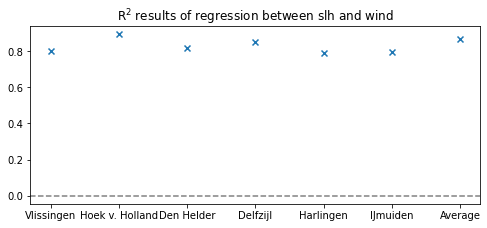

In [244]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, 'era5')

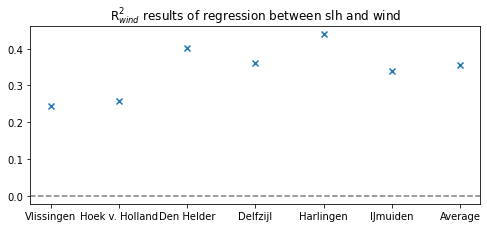

In [245]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, 'era5')

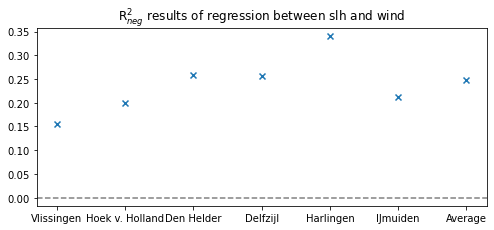

In [246]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{neg}$', model, 'era5')

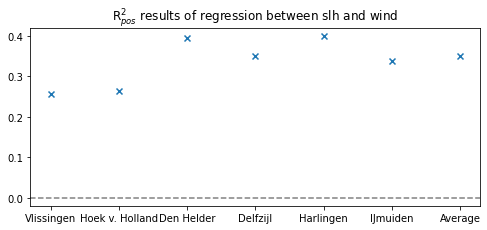

In [247]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{pos}$', model, 'era5')

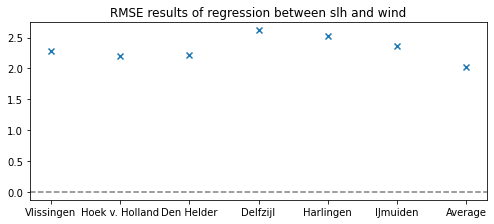

In [248]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, 'era5')

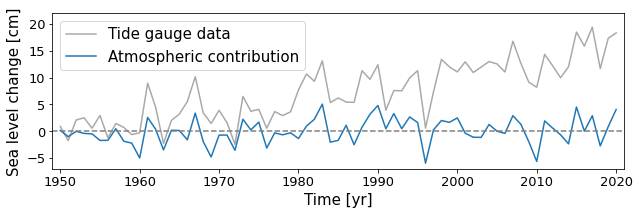

In [249]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

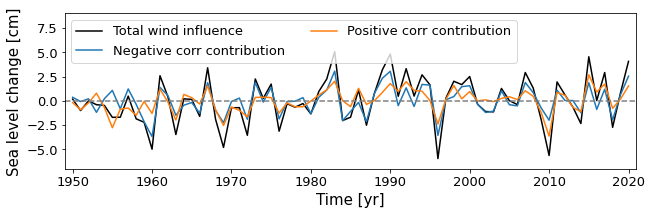

In [250]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

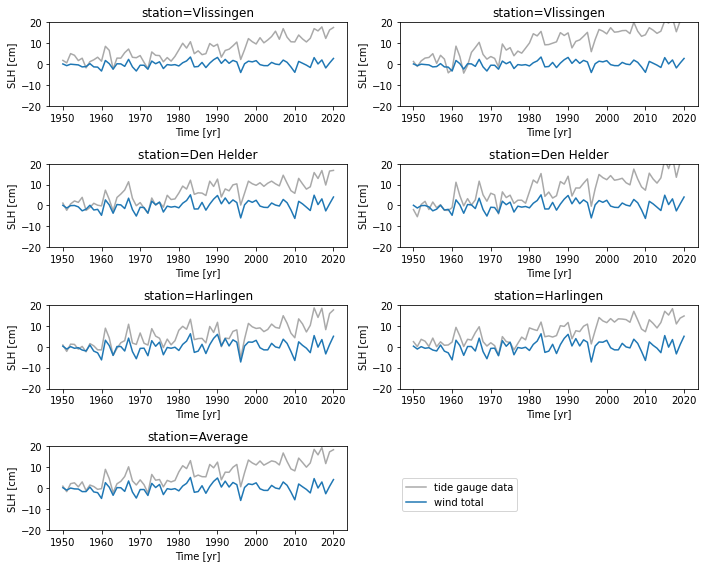

In [251]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, 'era5')

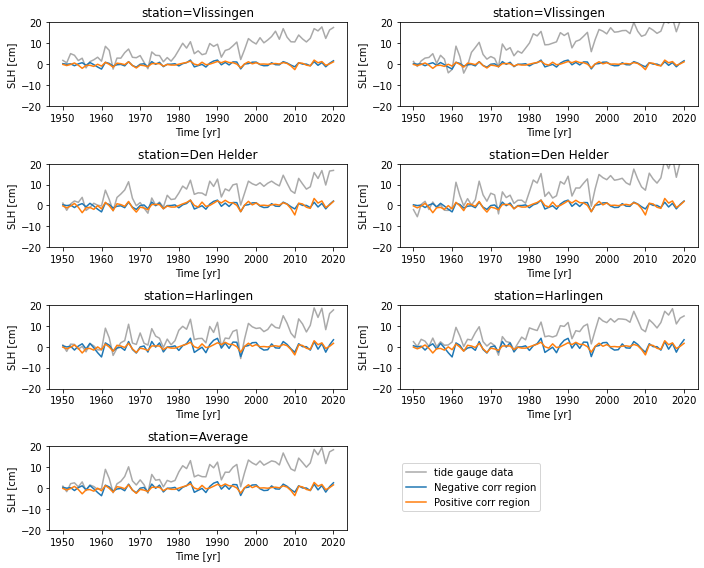

In [252]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region'], model, 'era5')

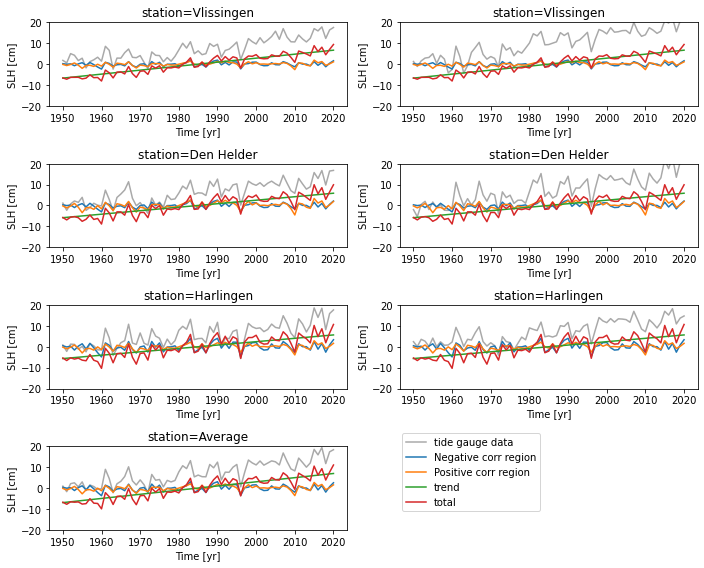

In [253]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, 'era5')

#### Plot trends

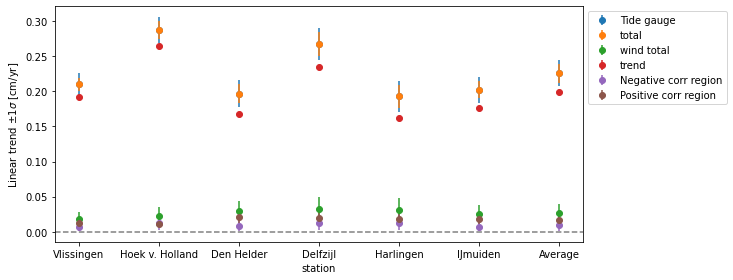

In [254]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, 'era5')

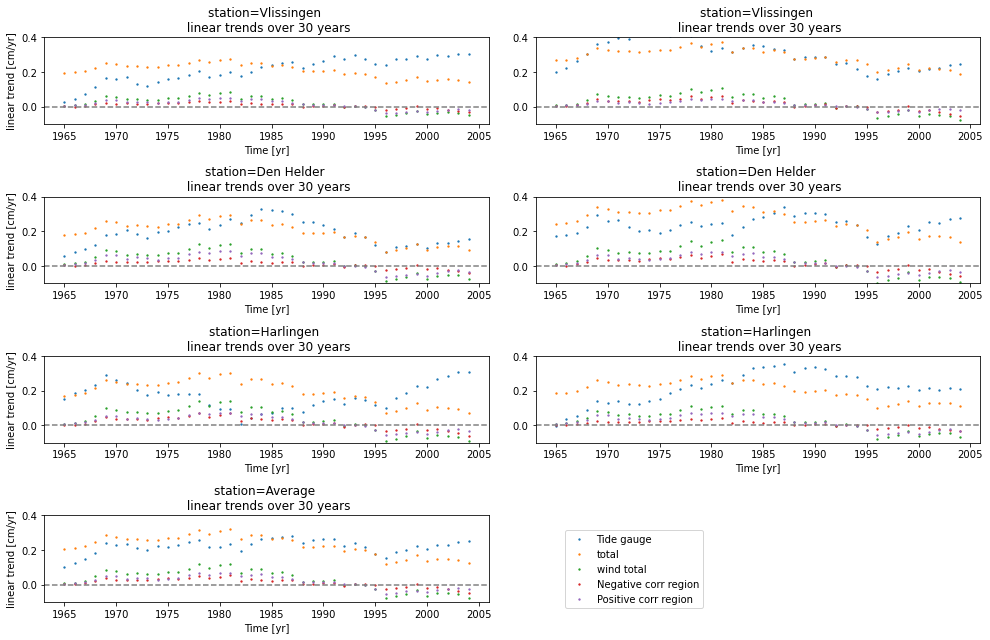

In [255]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'Negative corr region', 
                                                                               'Positive corr region'], 30, model, 'era5', 
                                                    errorbar = False)

## 20cr observational data

#### Import and plot tide gauge data

In [256]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = '20cr')

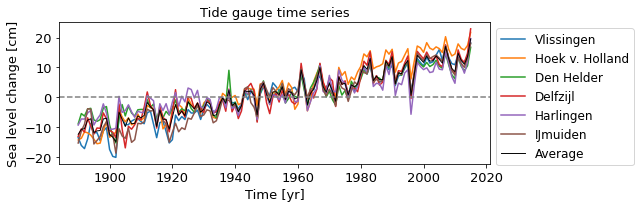

In [257]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [258]:
pres_data_20cr = imprt.import_obs_wind_data(model = model, data_type = '20cr')

In [259]:
pres_data_20cr

,Negative corr region,Positive corr region
time,,
1836,101172.718750,101556.312500
1837,101427.296875,101524.351562
1838,101464.117188,101420.007812
1839,101516.359375,101460.570312
1840,101266.679688,101507.367188
...,...,...
2011,101000.593750,101683.976562
2012,101078.296875,101656.304688
2013,101108.898438,101630.101562


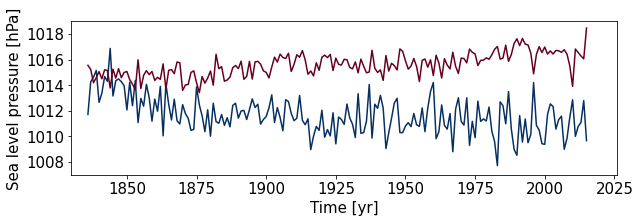

In [260]:
figs.plot_obs_pres_data(pres_data_20cr, model, '20cr', title = False)

#### Plot the Dangendorf regions

In [261]:
pres_corr, tg_corr = imprt.import_pres_tg_corr_data('20cr')

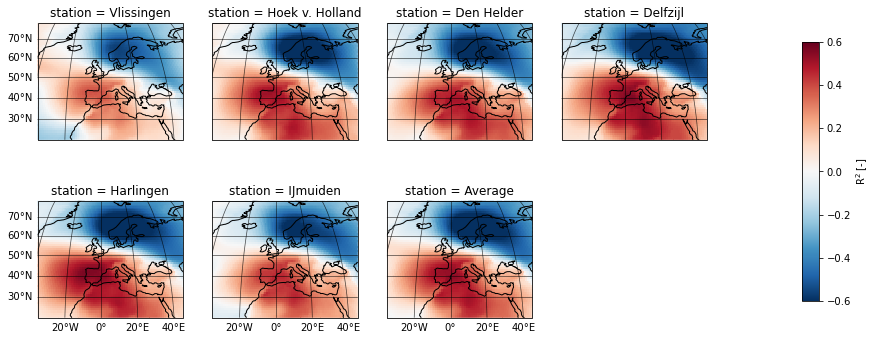

In [262]:
figs.dangendorf_all_stations_corr(pres_corr, tg_corr, '20cr')

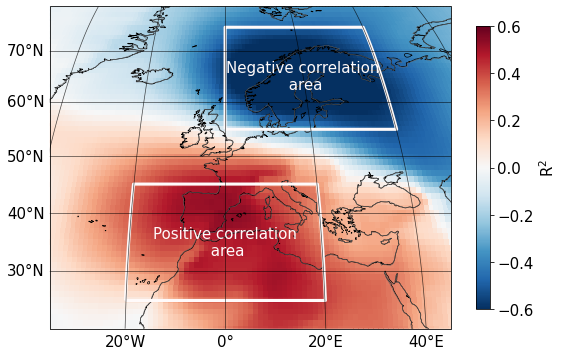

In [263]:
figs.dangendorf_regions_plot(pres_corr, tg_corr, '20cr', year_start = 1890, year_final = 2015)

### Perform regression

In [264]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(pres_data_20cr, tg_data, wind_model = model, data_type = '20cr')

In [265]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, neg}$","R$^2_{adj, pos}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.90469,0.20811,0.08302,0.280975,0.889893,0.902347,0.188637,0.060472,0.263294,0.887185
Hoek v. Holland,0.932915,0.253188,0.116926,0.326219,0.901032,0.931266,0.234823,0.095211,0.309651,0.898598
Den Helder,0.848713,0.34092,0.173209,0.38001,0.769269,0.844993,0.324713,0.152879,0.364764,0.763595
Delfzijl,0.878243,0.33059,0.179731,0.378183,0.799986,0.875249,0.314129,0.15956,0.362892,0.795068
Harlingen,0.84264,0.447276,0.255064,0.454656,0.688735,0.83877,0.433684,0.236746,0.441246,0.681081
IJmuiden,0.880034,0.134184,0.116447,0.263654,0.851716,0.877084,0.112894,0.09472,0.245547,0.84807
Average,0.922278,0.287956,0.150036,0.354677,0.869567,0.920366,0.270447,0.129135,0.338808,0.866359


In [266]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.904690,0.208110,0.083020,0.280975,2.723183,-6.043120,-0.834647,0.701825,11.289337
Hoek v. Holland,0.932915,0.253188,0.116926,0.326219,2.477018,-4.528600,-1.385527,1.044557,12.044803
Den Helder,0.848713,0.340920,0.173209,0.380010,2.589027,-3.277828,-1.436092,1.255862,7.283745
Delfzijl,0.878243,0.330590,0.179731,0.378183,2.917121,-4.747057,-1.932414,1.385195,9.434469
Harlingen,0.842640,0.447276,0.255064,0.454656,2.481703,-2.816051,-1.886204,1.633585,6.038484
IJmuiden,0.880034,0.134184,0.116447,0.263654,3.051548,-6.117101,-1.683900,0.136308,11.140353
Average,0.922278,0.287956,0.150036,0.354677,2.194275,-4.588293,-1.526464,1.026222,9.538532


In [267]:
timeseries_20cr

Vlissingen                                             \
     Negative corr region Positive corr region      trend      total   
time                                                                   
1836            -0.037013            -0.019665 -19.445373 -19.502051   
1837            -1.478257            -0.265384 -19.228107 -20.971748   
1838            -1.686708            -1.067590 -19.010840 -21.765138   
1839            -1.982467            -0.755741 -18.793573 -21.531782   
1840            -0.568954            -0.395962 -18.576307 -19.541222   
...                   ...                  ...        ...        ...   
2011             0.937439             0.961831  18.576307  20.475577   
2012             0.497538             0.749086  18.793573  20.040198   
2013             0.324294             0.547634  19.010840  19.882767   
2014            -0.646267             0.369906  19.228107  18.951746   
2015             1.129260             2.222620  19.445373  22.797254   

                     Hoek v. Holland                                  \
     wind total Negative corr region Positive corr region      trend   
time                                                                   
1836  -0.056677            -0.061442            -0.029268 -20.746629   
1837  -1.743641            -2.453931            -0.394982 -20.514824   
1838  -2.754298            -2.799963            -1.588939 -20.283018   
1839  -2.738208            -3.290927            -1.124802 -20.051212   
1840  -0.964916            -0.944473            -0.589326 -19.819406   
...         ...                  ...                  ...        ...   
2011   1.899270             1.556165             1.431533  19.819406   
2012   1.246624             0.825922             1.114897  20.051212   
2013   0.871927             0.538332             0.815066  20.283018   
2014  -0.276360            -1.072813             0.550547  20.514824   
2015   3.351881             1.874590             3.308020  20.746629   

                            ...             IJmuiden                       \
          total wind total  ... Negative corr region Positive corr region   
time                        ...                                             
1836 -20.837339  -0.090710  ...            -0.074673            -0.003819   
1837 -23.363736  -2.848913  ...            -2.982386            -0.051543   
1838 -24.671920  -4.388902  ...            -3.402936            -0.207346   
1839 -24.466941  -4.415729  ...            -3.999630            -0.146779   
1840 -21.353206  -1.533800  ...            -1.147866            -0.076903   
...         ...        ...  ...                  ...                  ...   
2011  22.807103   2.987698  ...             1.891285             0.186806   
2012  21.992030   1.940818  ...             1.003784             0.145487   
2013  21.636416   1.353399  ...             0.654263             0.106361   
2014  19.992558  -0.522266  ...            -1.303843             0.071843   
2015  25.929240   5.182610  ...             2.278284             0.431675   

                                                   Average  \
          trend      total wind total Negative corr region   
time                                                         
1836 -19.188756 -19.267249  -0.078493            -0.067692   
1837 -18.974357 -22.008285  -3.033928            -2.703547   
1838 -18.759957 -22.370240  -3.610283            -3.084778   
1839 -18.545558 -22.691967  -4.146410            -3.625684   
1840 -18.331158 -19.555928  -1.224769            -1.040546   
...         ...        ...        ...                  ...   
2011  18.331158  20.409249   2.078091             1.714459   
2012  18.545558  19.694829   1.149271             0.909935   
2013  18.759957  19.520581   0.760624             0.593092   
2014  18.974357  17.742356  -1.232001            -1.181940   
2015  19.188756  21.898716   2.709960             2.065276   

                                                 

In [268]:
timeseries_20cr.max()

Vlissingen       Negative corr region     2.235294
                 Positive corr region     2.222620
                 trend                   19.445373
                 total                   22.797254
                 wind total               3.352654
Hoek v. Holland  Negative corr region     3.710623
                 Positive corr region     3.308020
                 trend                   20.746629
                 total                   25.929240
                 wind total               5.364392
Den Helder       Negative corr region     3.846043
                 Positive corr region     3.977205
                 trend                   12.545922
                 total                   18.466131
                 wind total               5.920209
Delfzijl         Negative corr region     5.175260
                 Positive corr region     4.386793
                 trend                   16.250448
                 total                   23.251759
                 wind total    

In [285]:
timeseries_20cr.min()

Vlissingen       Negative corr region    -2.958733
                 Positive corr region    -1.659514
                 trend                  -19.445373
                 total                  -22.047634
                 wind total              -4.340394
Hoek v. Holland  Negative corr region    -4.911544
                 Positive corr region    -2.469925
                 trend                  -20.746629
                 total                  -25.860111
                 wind total              -6.967929
Den Helder       Negative corr region    -5.090791
                 Positive corr region    -2.969571
                 trend                  -12.545922
                 total                  -18.987665
                 wind total              -7.563166
Delfzijl         Negative corr region    -6.850201
                 Positive corr region    -3.275389
                 trend                  -16.250448
                 total                  -24.375085
                 wind total    

In [269]:
timeseries_20cr.std()

Vlissingen       Negative corr region     0.836975
                 Positive corr region     0.703783
                 trend                   11.320827
                 total                   12.218287
                 wind total               1.370045
Hoek v. Holland  Negative corr region     1.389392
                 Positive corr region     1.047470
                 trend                   12.078401
                 total                   13.519427
                 wind total               2.170389
Den Helder       Negative corr region     1.440097
                 Positive corr region     1.259365
                 trend                    7.304062
                 total                    8.996576
                 wind total               2.399409
Delfzijl         Negative corr region     1.937804
                 Positive corr region     1.389059
                 trend                    9.460786
                 total                   11.513617
                 wind total    

In [270]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

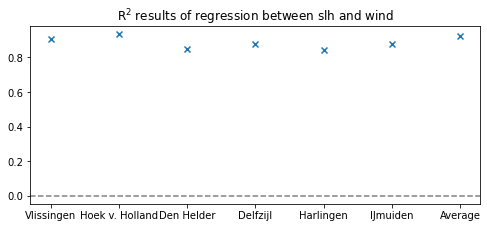

In [271]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, '20cr')

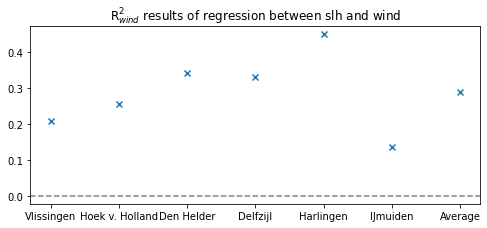

In [272]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, '20cr')

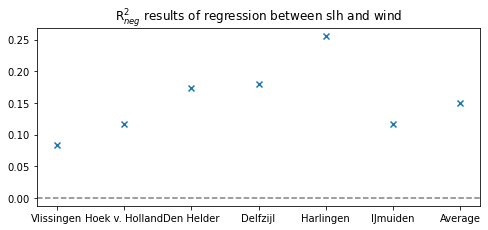

In [273]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{neg}$', model, '20cr')

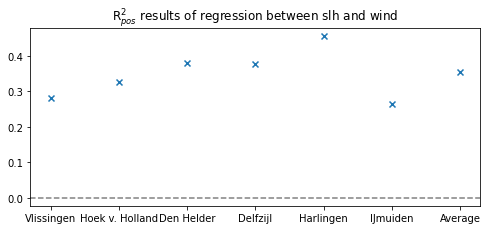

In [274]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{pos}$', model, '20cr')

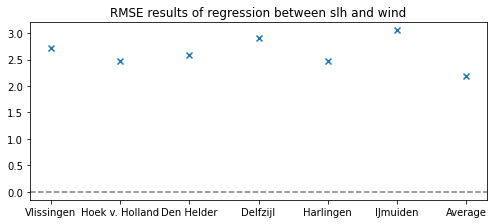

In [275]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, '20cr')

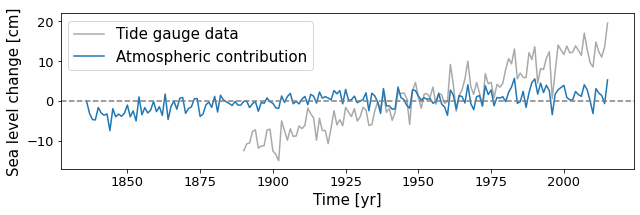

In [276]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

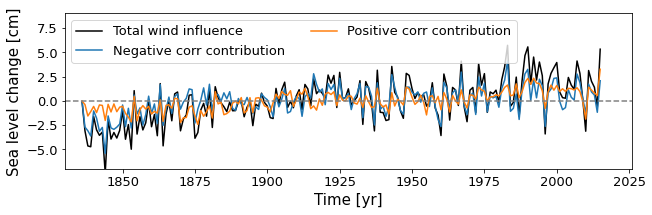

In [277]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

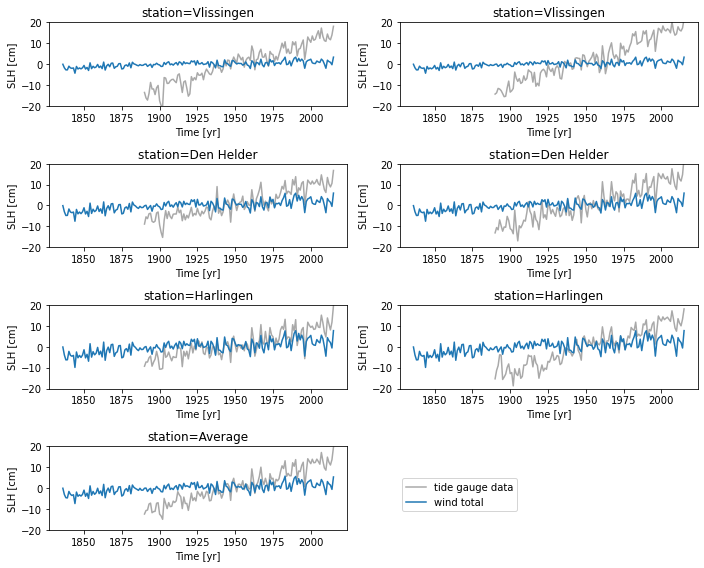

In [278]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, '20cr')

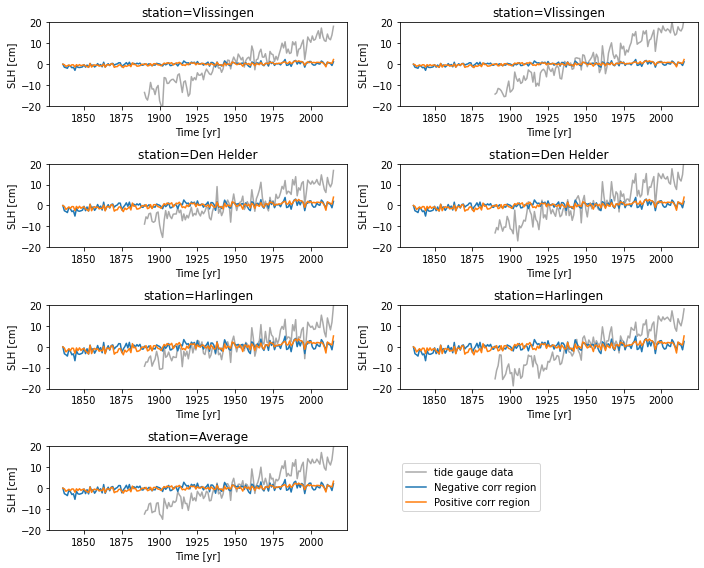

In [279]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region'], model, '20cr')

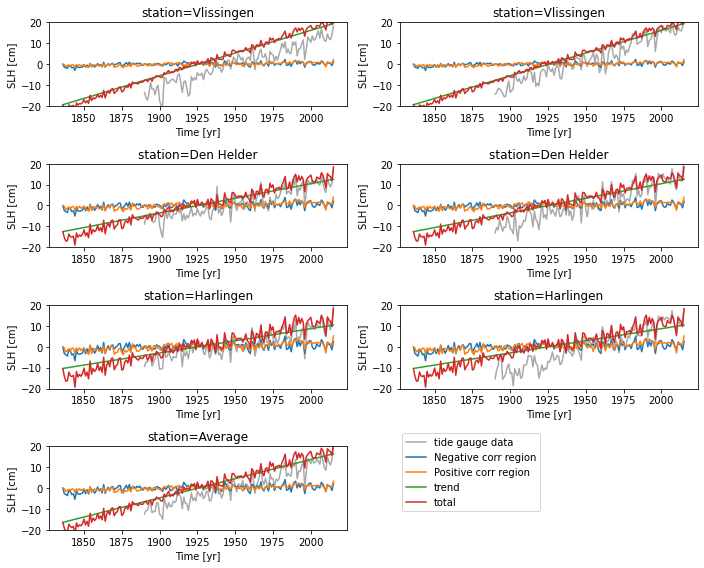

In [280]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region', 'trend', 'total'], 
                                     model, '20cr')

#### Plot trends

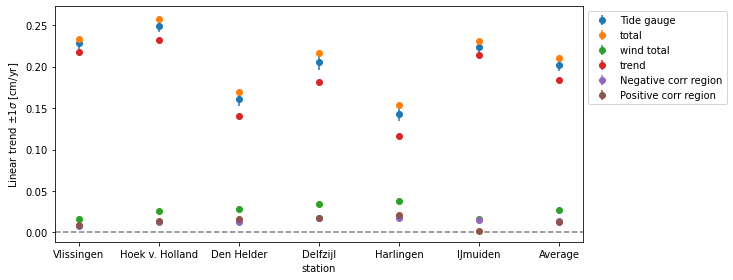

In [281]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, '20cr')

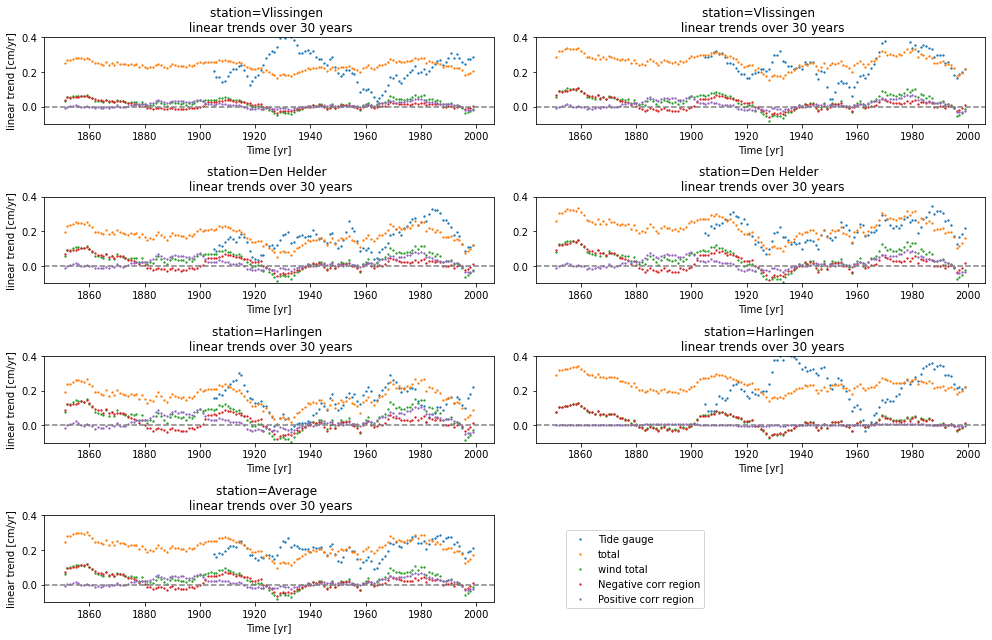

In [282]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, 
                                                    ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 
                                                    30, model, '20cr', errorbar = False)

#### Calculate trends

In [283]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

periods = ['1950-2014', '1950-2020', '1836-2015', '1890-2015']
df = pd.DataFrame({'period':periods, 'trend': [np.nan, np.nan, np.nan, np.nan], 'se': [np.nan, np.nan, np.nan, np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).slope*10
df['ERA5', 'trend']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).slope*10

# ERA5 standard errors
df['ERA5', 'se']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['ERA5', 'se']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).slope*10
df['20CRv3', 'trend']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).slope*10
df['20CRv3', 'trend']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).slope*10


# 20CRv3 standard errors
df['20CRv3', 'se']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['20CRv3', 'se']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).stderr*10
df['20CRv3', 'se']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend']['1950-2014'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).slope*10
df['tg_data', 'trend']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).slope*10
df['tg_data', 'trend']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se']['1950-2014'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).stderr*10
df['tg_data', 'se']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).stderr*10
df['tg_data', 'se']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).stderr*10



df



ERA5              20CRv3             tg_data          
              trend        se     trend        se     trend        se
period                                                               
1950-2014       NaN       NaN       NaN       NaN  2.169399  0.200802
1950-2020  0.266769  0.135308       NaN       NaN  2.244302  0.199460
1836-2015       NaN       NaN  0.265909  0.026147       NaN       NaN
1890-2015       NaN       NaN  0.182198  0.044616  2.017917  0.070184

In [284]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.568070,-14.338618,-8.918373,-13.130697,-9.327698,-15.353157,-12.439436
1891,-16.172635,-13.749641,-5.471740,-10.591202,-7.283230,-11.314296,-10.763791
1892,-17.224313,-11.619300,-6.314474,-11.679703,-7.327917,-9.078860,-10.540761
1893,-14.005682,-11.928052,-3.963830,-6.906845,-5.278794,-3.857964,-7.656861
1894,-8.760928,-12.686193,-3.713707,-9.698990,-4.429588,-3.998047,-7.214575
...,...,...,...,...,...,...,...
2011,14.428478,17.892748,13.414106,15.889498,13.804277,13.449798,14.813151
2012,12.334111,16.393210,10.366510,12.741816,10.958842,11.360521,12.359168
2013,11.681427,15.880764,8.882982,11.696435,8.077256,10.017466,11.039388
